In [6]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_train = X_train / 255
X_test = X_test / 255

In [8]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
autoencoder.summary()    # 顯示模型摘要資訊


encoder = Model(input_img, encoded)
encoder.summary()    # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()   

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [9]:
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), 
                epochs=10, batch_size=128, shuffle=True, verbose=2)

Epoch 1/10
469/469 - 79s - loss: 0.2171 - accuracy: 0.7935 - val_loss: 0.1481 - val_accuracy: 0.8017
Epoch 2/10
469/469 - 78s - loss: 0.1361 - accuracy: 0.8048 - val_loss: 0.1255 - val_accuracy: 0.8063
Epoch 3/10
469/469 - 78s - loss: 0.1220 - accuracy: 0.8081 - val_loss: 0.1165 - val_accuracy: 0.8080
Epoch 4/10
469/469 - 78s - loss: 0.1150 - accuracy: 0.8095 - val_loss: 0.1115 - val_accuracy: 0.8095
Epoch 5/10
469/469 - 78s - loss: 0.1107 - accuracy: 0.8103 - val_loss: 0.1082 - val_accuracy: 0.8100
Epoch 6/10
469/469 - 79s - loss: 0.1077 - accuracy: 0.8108 - val_loss: 0.1053 - val_accuracy: 0.8101
Epoch 7/10
469/469 - 78s - loss: 0.1053 - accuracy: 0.8112 - val_loss: 0.1032 - val_accuracy: 0.8103
Epoch 8/10
469/469 - 79s - loss: 0.1034 - accuracy: 0.8115 - val_loss: 0.1015 - val_accuracy: 0.8107
Epoch 9/10
469/469 - 78s - loss: 0.1020 - accuracy: 0.8117 - val_loss: 0.1003 - val_accuracy: 0.8106
Epoch 10/10
469/469 - 79s - loss: 0.1007 - accuracy: 0.8119 - val_loss: 0.0997 - val_accura

In [10]:
encoded_imgs = encoder.predict(X_test)

In [11]:
decoded_imgs = decoder.predict(encoded_imgs)

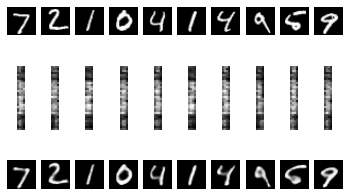

In [13]:
n=10
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

In [14]:
autoencoder.save("ae_cnn.h5")